In [3]:
import pandas as pd

home_data = pd.read_csv('housing.csv')
home_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
import pandas as pd

home_data = pd.read_csv('housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


<Axes: xlabel='longitude', ylabel='latitude'>

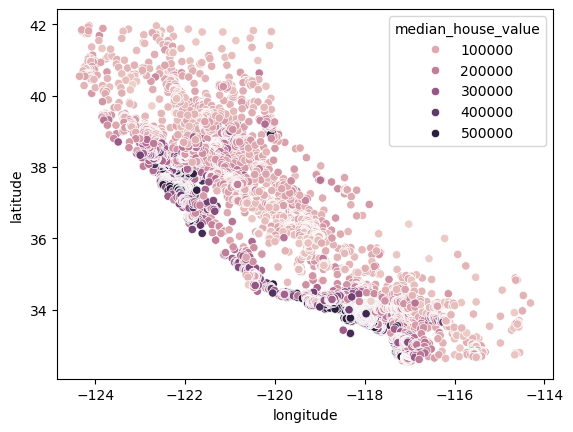

In [2]:
import seaborn as sns

sns.scatterplot(data=home_data, x='longitude', y = 'latitude', hue='median_house_value')

In [5]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test , y_train, y_test = train_test_split(home_data[['latitude', 'longitude']],home_data[['median_house_value']], test_size=0.3, random_state=1)

In [10]:
from sklearn.preprocessing import normalize

In [11]:
x_train_norm = normalize(x_train)
x_test_norm= normalize(x_test)

In [13]:
# x_train_norm

In [14]:
from sklearn.cluster import KMeans

In [15]:
model = KMeans(n_clusters=3, random_state=0, n_init='auto')

In [16]:
model.fit(x_train_norm)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

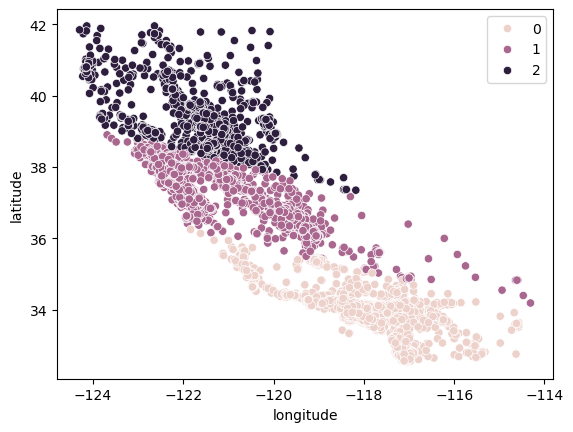

In [23]:
sns.scatterplot(data = x_train, x = 'longitude', y = 'latitude', hue = model.labels_)

<Axes: ylabel='median_house_value'>

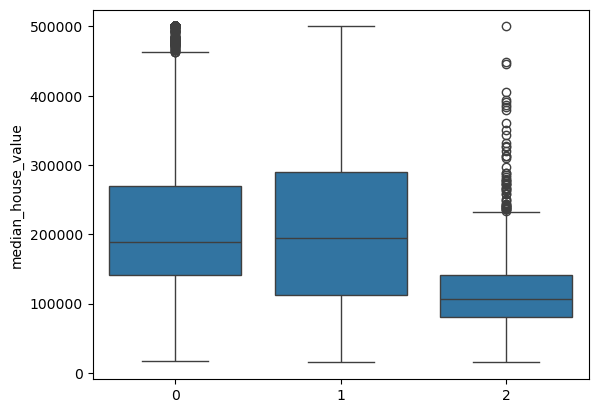

In [24]:
sns.boxplot(x = model.labels_, y = y_train['median_house_value'])

In [26]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(x_train_norm, model.labels_, metric='euclidean')

Choosing the best number of clusters

In [ ]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(x_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(x_train_norm, model.labels_, metric='euclidean'))

We can then first visually look at a few different values of k. 

First we look at k = 2.

In [ ]:
sns.scatterplot(data = x_train, x = 'longitude', y = 'latitude', hue = fits[0].labels_)

The model does an ok job of splitting the state into two halves, but probably doesn’t capture enough nuance in the California housing market. 

Next, we look at k = 4. 

In [ ]:
sns.scatterplot(data = x_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_)

We see this plot groups California into more logical clusters across the state based on 
how far North or South the houses are in the state. 

This model most likely captures more nuance in the housing market as we move across the state.

Finally, we look at k = 7. 

In [ ]:
sns.scatterplot(data = x_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_)

The above graph appears to have too many clusters. We have sacrifice easy interpretation of the clusters for a “more accurate” geo-clustering result. 
Typically, as we increase the value of K, we see improvements in clusters and what they represent until a certain point.
We then start to see diminishing returns or even worse performance. 
We can visually see this to help make a decision on the value of k by using 
an elbow plot where the y-axis is a measure of goodness of fit and the x-axis is the value of k. 

In [ ]:
sns.lineplot(x = K, y = score)

We typically choose the point where the improvements in performance start to flatten or get worse. We see k = 5 is probably the best we can do without overfitting. 

We can also see that the clusters do a relatively good job of breaking California into distinct clusters and these clusters map relatively well to different price ranges as seen below. 

In [ ]:
sns.scatterplot(data = x_train, x = 'longitude', y = 'latitude', hue = fits[3].labels_)

NameError: name 'X_train' is not defined

In [ ]:
sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value'])